In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

In [12]:
pd.set_option('display.max_rows', 100)

In [13]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [14]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/German_Kaggle.csv')

In [16]:
df.head(10)

,id,url,Titel,Body,Kategorie,Datum,Quelle,Fake,Art
0,773233,http://www.der-postillon.com/2018/01/grokoleak...,Exklusiv! Das geheime WhatsApp-Chat-Protokoll ...,Die Sondierungsgespräche zwischen Union und SP...,wirtschaft,18-01-2018 0:00,Postillion,1,NaN
1,773234,http://www.der-postillon.com/2018/01/trump-san...,"Trump droht, jeden zu verspeisen, der an seine...",Nun ist es auch medizinisch offiziell bestätig...,wirtschaft,17-01-2018 0:00,Postillion,1,NaN
2,773235,http://www.der-postillon.com/2018/01/fdp-sondi...,"Soli runter, keine Steuererhöhungen, kein Klim...","Es waren zähe Verhandlungen, doch die Freien D...",wirtschaft,12-01-2018 0:00,Postillion,1,NaN
3,773236,http://www.der-postillon.com/2018/01/joachim-s...,Hat sie eine Affäre? Joachim Sauer glaubt Ange...,Wo treibt sie sich immer bis spät in die Nacht...,wirtschaft,09-01-2018 0:00,Postillion,1,NaN
4,773237,http://www.der-postillon.com/2018/01/halb-so-s...,"""Er hat ja nur HALBneger gesagt"": So begründet...",Der Parteivorstand drückt nochmal ein Auge zu:...,wirtschaft,08-01-2018 0:00,Postillion,1,NaN
5,773238,http://www.der-postillon.com/2018/01/kim-knopf...,"""Bald habe ICH den größten Knopf!"": Kim opfert...",Im Atomstreit mit Nordkorea hat US-Präsident T...,wirtschaft,03-01-2018 0:00,Postillion,1,NaN
6,773239,http://www.der-postillon.com/2017/12/christian...,"Christian Lindner nun doch bereit, lieber fals...",Kurswechsel bei den freien Demokraten: FDP-Che...,wirtschaft,22-12-2017 0:00,Postillion,1,NaN
7,773240,http://www.der-postillon.com/2017/12/busfahrka...,Immer mehr Rentner können sich Busfahrkarte zu...,Sozialverbände in Deutschland schlagen Alarm. ...,wirtschaft,22-12-2017 0:00,Postillion,1,NaN
8,773241,http://www.der-postillon.com/2017/12/martin-20...,"""Stopp! Tut es nicht!"": Zeitreisender aus dem ...",Dramatische Szenen auf dem SPD-Parteitag in Be...,wirtschaft,07-12-2017 0:00,Postillion,1,NaN
9,773242,http://www.der-postillon.com/2018/01/ende-sond...,Paukenschlag! Christian Lindner bricht Sondier...,Politisches Beben in Berlin! Viele Beobachter ...,wirtschaft,10-01-2018 0:00,Postillion,1,NaN


In [17]:
print('Columns with missing values:')
print(df.isnull().sum())

Columns with missing values:
id               0
url              0
Titel            0
Body             0
Kategorie     1322
Datum            0
Quelle           0
Fake             0
Art          40972
dtype: int64


In [18]:
df['Fake'].value_counts(normalize=True)

0    0.927554
1    0.072446
Name: Fake, dtype: float64

In [19]:
df['Quelle'].value_counts()

Reuters        32984
Pressetext     22896
Kleine          3361
Postillion      2040
Einezeitung     1322
Tagespresse     1130
Zeitspiegel      135
Name: Quelle, dtype: int64

In [20]:
df.groupby('Quelle')['Fake'].sum()

Quelle
Einezeitung    1322
Kleine            0
Postillion     2040
Pressetext        0
Reuters           0
Tagespresse    1130
Zeitspiegel     135
Name: Fake, dtype: int64

In [21]:
# By the way: This is my my favourite one...
df[df['Quelle'] == 'Zeitspiegel']['Titel'][36154]

'Gesundheitscheck bestätigt: US-Präsident Donald Trump vollkommen gesundes und normales Arschloch'

In [22]:
df['Kategorie'].value_counts()

Weltnachrichten            9626
Unternehmensnachrichten    7968
BUSINESS                   6628
LEBEN                      6436
Inlandsnachrichten         5461
HIGHTECH                   4842
MEDIEN                     4598
Wirtschaftsnachrichten     4497
Top-Nachrichten            2884
Politik                    1836
Marktnachrichten           1669
wirtschaft                  938
International               731
Wirtschaft                  680
Österreich                  522
panorama                    495
Chronik                     483
ADHOC                       392
Sport                       352
Leute                       337
sport                       308
Kultur                      200
wissenschaft                129
eltnachrichten              128
nlandsnachrichten           116
medien                       85
leute                        85
irtschaftsnachrichten        41
nternehmensnachrichten       39
Wissen                       14
Panorama                     12
Gesundhe

In [23]:
df.groupby(['Quelle', 'Kategorie'])['Fake'].sum()

Quelle       Kategorie              
Kleine       International                0
             Kultur                       0
             Leute                        0
             Politik                      0
             Sport                        0
             Wirtschaft                   0
             Österreich                   0
Postillion   leute                       85
             medien                      85
             panorama                   495
             sport                      308
             wirtschaft                 938
             wissenschaft               129
Pressetext   ADHOC                        0
             BUSINESS                     0
             HIGHTECH                     0
             LEBEN                        0
             MEDIEN                       0
Reuters      Inlandsnachrichten           0
             Marktnachrichten             0
             Politik                      0
             Top-Nachrichten           

In [24]:
print(df.duplicated(subset=['Titel', 'Body']).value_counts(normalize=True))
df[df.duplicated(subset=['Titel', 'Body'])]

False    0.980444
True     0.019556
dtype: float64


,id,url,Titel,Body,Kategorie,Datum,Quelle,Fake,Art
2180,775488,https://de.reuters.com/article/deutschland-koa...,Kauder - An Sondierungs-Ergebnissen gibt es ni...,Unions-Fraktionschef Volker Kauder hat sich ge...,Inlandsnachrichten,15-01-2018 0:00,Reuters,0,NaN
2217,775525,https://de.reuters.com/article/deutschland-koa...,Kooperationsverbot in Bildungsfinanzierung sol...,Union und SPD wollen das Kooperationsverbot in...,Inlandsnachrichten,12-01-2018 0:00,Reuters,0,NaN
2301,775609,https://de.reuters.com/article/deutschland-koa...,Groko-Sondierer rütteln am Klimaschutzziel für...,"Die Sondierer von CDU, CSU und SPD haben bei F...",Top-Nachrichten,08-01-2018 0:00,Reuters,0,NaN
2351,775660,https://de.reuters.com/article/deutschland-eas...,Easyjet will Passagierzahl in Deutschland verd...,Der britische Billigflieger Easyjet will nach ...,Unternehmensnachrichten,05-01-2018 0:00,Reuters,0,NaN
2366,775675,https://de.reuters.com/article/usa-trump-idDEK...,Trump lässt nach Bruch mit Bannon die Anwälte los,US-Präsident Donald Trump versucht seinen Ex-C...,Weltnachrichten,05-01-2018 0:00,Reuters,0,NaN
...,...,...,...,...,...,...,...,...,...
63859,838140,http://www.kleinezeitung.at//leute/5367537/Sta...,62. Opernball: Das ist die Gästeliste,Die Übertragung des Balles im Fernsehen dürfte...,Leute,07-02-2018 0:00,Kleine,0,NaN
63860,838141,http://www.kleinezeitung.at//leute/5367585/Ver...,Guido Maria Kretschmer freut sich auf Hochzeit,Kretschmer und der zehn Jahre ältere Mutters l...,Leute,07-02-2018 0:00,Kleine,0,NaN
63861,838142,http://www.kleinezeitung.at//leute/5367456/Ers...,Kylie Jenner verriet den Namen ihrer Tochter,"Der Vorname ""Stormi"" kam bei ihren Fans gut an...",Leute,07-02-2018 0:00,Kleine,0,NaN
63862,838143,http://www.kleinezeitung.at//kaernten/5378399/...,Verendete Kühe auf Hof: Staatsanwaltschaft prü...,Schwere Vorwürfe gegen Landwirt aus Hüttenberg...,Österreich,26-02-2018 0:00,Kleine,0,NaN


In [25]:
# We drop them...
df = df.drop_duplicates(subset=['Titel', 'Body']).reset_index()

In [26]:
df.shape

(62619, 10)

In [27]:
# Count for max character and word length in Titel and Body
print('Max # of char in Title: %i' % df['Titel'].str.len().max())
cnt_lst = []
for i in range(0, len(df)):
    cnt_lst.append(len(df['Titel'][i].split()))
print('Max # words in Title: %i' % max(cnt_lst))
print('Average # of words in Title: %i' % np.mean(cnt_lst))

print('Max char length of Body: %i' % df['Body'].str.len().max())
cnt_lst = []
for i in range(0, len(df)):
    cnt_lst.append(len(df['Body'][i].split()))
print('Max # of words in Body: %i' % max(cnt_lst))
print('Average # of words in Body: %i' % np.mean(cnt_lst))

Max # of char in Title: 431
Max # words in Title: 48
Average # of words in Title: 6
Max char length of Body: 10032
Max # of words in Body: 1455
Average # of words in Body: 336


<Axes: ylabel='Frequency'>

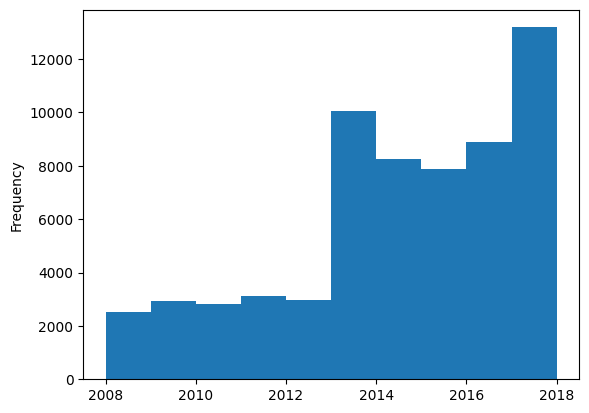

In [28]:
df['Datum'] = pd.to_datetime(df['Datum'])
df['Jahr'] = df['Datum'].apply(lambda x: x.year)
df['Jahr'].plot(kind = 'hist')

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Init a stopword list from nltk and use it as arg in CountVectorizer...
stopword_list = stopwords.words('german')

In [31]:
count_vec_titel = CountVectorizer(stop_words=stopword_list,
                                  token_pattern=r'\b[a-zA-Z]{2,}\b',
                                  max_features=50)
                                  #ngram_range=(2,2)
                                #)
# We first do that on Titel...
count_vec_titel.fit(df['Titel'])
word_counts_in_titel = count_vec_titel.transform(df['Titel']).todense()

In [32]:
# Extracting feature names after fitting the CountVectorizer
feature_names = count_vec_titel.get_feature_names_out()

df_titel = pd.DataFrame(word_counts_in_titel, columns=feature_names)
df_titel.head()

,ab,ag,bank,banken,brexit,chef,china,dax,deutsche,deutschland,...,trotz,trump,ukraine,un,us,usa,vw,warnt,wegen,wirtschaft
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_titel_trans = pd.DataFrame(df_titel.T.sum(axis=1), columns=['count'])

In [34]:
df_titel_trans.sort_values(by='count', ascending=False).head(50)

,count
us,2191
eu,1788
deutsche,1425
mehr,1371
usa,1267
euro,1185
neue,1175
ab,1149
merkel,1030
deutschland,1015


In [35]:
count_vec_body = CountVectorizer(stop_words=stopword_list,
                                  token_pattern=r'\b[a-zA-Z]{2,}\b',
                                  max_features=50,
                                  #ngram_range=(2,2)
                                )
count_vec_body.fit(df['Body'])
word_counts_in_body = count_vec_body.transform(df['Body']).todense()

In [36]:
# Extracting feature names after fitting the CountVectorizer
feature_names_body = count_vec_body.get_feature_names_out()

df_body = pd.DataFrame(word_counts_in_body, columns=feature_names_body)
df_body.head()

,ab,allerdings,beim,bereits,com,dabei,de,deutschen,deutschland,dollar,...,viele,wegen,weitere,worden,wurde,wurden,www,zudem,zufolge,zwei
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_body_trans = pd.DataFrame(df_body.T.sum(axis=1), columns=['count'])
df_body_trans.sort_values(by='count', ascending=False).head(20)

,count
prozent,81511
sagte,54035
mehr,51646
euro,51302
http,46753
sei,41417
seit,30498
us,30249
unternehmen,29656
www,28723


In [38]:
!pip install transformers

In [39]:
import time
import numpy as np
import pandas as pd

import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from keras.preprocessing.sequence import pad_sequences

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertPreTrainedModel, BertModel
from transformers import get_linear_schedule_with_warmup

In [40]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print(f'Found GPU at: {device_name}')

Found GPU at: /device:GPU:0


In [41]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU in use:', torch.cuda.get_device_name(0))
else:
    print('using the CPU')
    device = torch.device("cpu")

GPU in use: Tesla T4


In [42]:
MAX_LEN = 128 # max sequences length
batch_size = 32

In [43]:
# Retrieve unique values from the 'Kategorie' column
unique_values = df['Fake'].unique()

# Print the unique values
print("Unique values:")
print(unique_values)

Unique values:
[1 0]


In [44]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
import numpy as np
from keras.preprocessing.sequence import pad_sequences

In [45]:
# Preprocessing function to prepare the data
def preprocessing(df):
    # Combine 'Body' and 'Titel' columns as input data
    sentences = df['Body'] + " " + df['Titel']  # Concatenating 'Body' and 'Titel'

    labels = df['Fake'].values  # Assuming 'Fake' column contains numerical labels

    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=True)

    encoded_sentences = []
    for sent in sentences:
        encoded_sent = tokenizer.encode(
                            sent,
                            add_special_tokens=True,
                            truncation=True,
                            max_length=MAX_LEN
                    )

        encoded_sentences.append(encoded_sent)
    encoded_sentences = pad_sequences(encoded_sentences, maxlen=MAX_LEN, dtype="long",
                            value=0, truncating="post", padding="post")
    return encoded_sentences, labels

def attention_masks(encoded_sentences):
    # attention masks, 0 for padding, 1 for actual token
    attention_masks = []
    for sent in encoded_sentences:
        att_mask = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
    return attention_masks

In [46]:
from sklearn.model_selection import train_test_split

# Assuming df is your original dataset

# Splitting the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [47]:
# Further splitting train_df into train and validation sets
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [48]:
# Preprocess the training set
train_encoded_sentences, train_labels = preprocessing(train_df)
train_attention_masks = attention_masks(train_encoded_sentences)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [49]:
# Preprocess the testing set
val_encoded_sentences, val_labels = preprocessing(val_df)
val_attention_masks = attention_masks(val_encoded_sentences)

In [50]:
train_inputs = torch.tensor(train_encoded_sentences)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_attention_masks)

In [51]:
validation_inputs = torch.tensor(val_encoded_sentences)
validation_labels = torch.tensor(val_labels)
validation_masks = torch.tensor(val_attention_masks)

In [52]:
# data loader for training
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [53]:
#data loader for validation
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [54]:
import random

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased",
    num_labels = 4,
    output_attentions = False,
    output_hidden_states = False,
)

model.cuda()

optimizer = AdamW(model.parameters(),
                  lr = 3e-5,
                  eps = 1e-8,
                  weight_decay = 0.01
                )

epochs = 3
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # 10% * datasetSize/batchSize
                                            num_training_steps = total_steps)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [55]:
def compute_accuracy(preds, labels):
    p = np.argmax(preds, axis=1).flatten()
    l = labels.flatten()
    return np.sum(p==l)/len(l)

def run_train(epochs):
    losses = []
    for e in range(epochs):
        print('======== Epoch {:} / {:} ========'.format(e + 1, epochs))
        start_train_time = time.time()
        total_loss = 0
        model.train()
        for step, batch in enumerate(train_dataloader):

            if step%10 == 0:
                elapsed = time.time()-start_train_time
                print(f'{step}/{len(train_dataloader)} --> Time elapsed {elapsed}')

            # input_data, input_masks, input_labels = batch
            input_data = batch[0].to(device)
            input_masks = batch[1].to(device)
            input_labels = batch[2].to(device)

            model.zero_grad()

            # forward propagation
            out = model(input_data,
                        token_type_ids = None,
                        attention_mask = input_masks,
                        labels = input_labels)

            loss = out[0]
            total_loss = total_loss + loss.item()

            # backward propagation
            loss.backward()

            torch.nn.utils.clip_grad_norm(model.parameters(), 1)

            optimizer.step()

        epoch_loss = total_loss/len(train_dataloader)
        losses.append(epoch_loss)
        print(f"Training took {time.time()-start_train_time}")

        # Validation
        start_validation_time = time.time()
        model.eval()
        eval_loss, eval_acc = 0,0
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to(device) for t in batch)
            eval_data, eval_masks, eval_labels = batch
            with torch.no_grad():
                out = model(eval_data,
                            token_type_ids = None,
                            attention_mask=eval_masks)
            logits = out[0]

            #  Uncomment for GPU execution
            logits = logits.detach().cpu().numpy()
            eval_labels = eval_labels.to('cpu').numpy()
            batch_acc = compute_accuracy(logits, eval_labels)

            # Uncomment for CPU execution
            # batch_acc = compute_accuracy(logits.numpy(), eval_labels.numpy())

            eval_acc += batch_acc
        print(f"Accuracy: {eval_acc/(step+1)}, Time elapsed: {time.time()-start_validation_time}")
    return losses

In [56]:
losses = run_train(epochs)

======== Epoch 1 / 3 ========
0/1253 --> Time elapsed 0.01842021942138672


<ipython-input-55-0a167088369f>:38: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), 1)


10/1253 --> Time elapsed 9.878824234008789
20/1253 --> Time elapsed 16.420692443847656
30/1253 --> Time elapsed 23.13478970527649
40/1253 --> Time elapsed 29.8178653717041
50/1253 --> Time elapsed 36.59652757644653
60/1253 --> Time elapsed 43.35603451728821
70/1253 --> Time elapsed 50.22015166282654
80/1253 --> Time elapsed 57.17368412017822
90/1253 --> Time elapsed 64.1311674118042
100/1253 --> Time elapsed 71.01948952674866
110/1253 --> Time elapsed 77.82444024085999
120/1253 --> Time elapsed 84.59530639648438
130/1253 --> Time elapsed 91.31616687774658
140/1253 --> Time elapsed 98.03249096870422
150/1253 --> Time elapsed 104.73107075691223
160/1253 --> Time elapsed 111.4588360786438
170/1253 --> Time elapsed 118.15837264060974
180/1253 --> Time elapsed 125.24073624610901
190/1253 --> Time elapsed 132.0150592327118
200/1253 --> Time elapsed 138.8125560283661
210/1253 --> Time elapsed 145.62236833572388
220/1253 --> Time elapsed 152.42271852493286
230/1253 --> Time elapsed 159.2192072

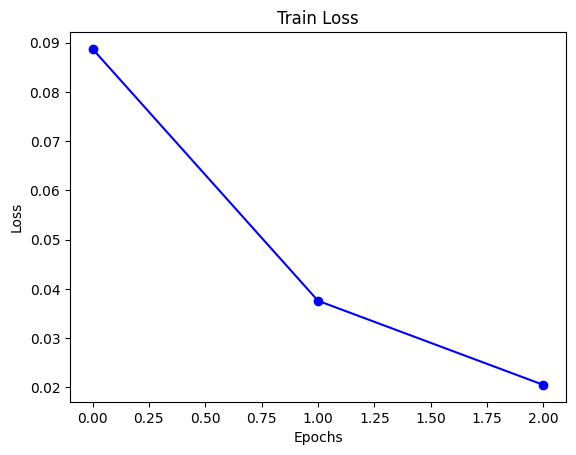

In [57]:
# plot losses
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(losses, 'b-o')
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [58]:
import os

output_dir = './model_save'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
# tokenizer.save_pretrained(output_dir)

In [71]:
from sklearn.metrics import classification_report

def run_test(df_test):
    test_encoded_sentences, test_labels = preprocessing(df_test)
    test_attention_masks = attention_masks(test_encoded_sentences)

    test_inputs = torch.tensor(test_encoded_sentences)
    test_labels = torch.tensor(test_labels)
    test_masks = torch.tensor(test_attention_masks)

    test_data = TensorDataset(test_inputs, test_masks, test_labels)
    test_sampler = SequentialSampler(test_data)
    test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

    model.eval()
    eval_loss, eval_acc = 0, 0
    all_preds = []
    all_labels = []

    for step, batch in enumerate(test_dataloader):
        batch = tuple(t.to(device) for t in batch)
        eval_data, eval_masks, eval_labels = batch
        with torch.no_grad():
            out = model(eval_data,
                        token_type_ids=None,
                        attention_mask=eval_masks)
        logits = out[0]
        logits = logits.detach().cpu().numpy()
        eval_labels = eval_labels.to('cpu').numpy()
        batch_acc = compute_accuracy(logits, eval_labels)
        eval_acc += batch_acc

        # Store predictions and true labels for later use
        all_preds.extend(np.argmax(logits, axis=1))
        all_labels.extend(eval_labels)

    accuracy = eval_acc / (step + 1)
    print(f"Accuracy: {accuracy}")

    # Generate and print the classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))


In [72]:
print("Evaluating on german \n")
run_test(test_df)

Evaluating on german 

Accuracy: 0.9885204081632653

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11596
           1       0.94      0.90      0.92       928

    accuracy                           0.99     12524
   macro avg       0.97      0.95      0.96     12524
weighted avg       0.99      0.99      0.99     12524

